# Pandas: Series, Data Frames and Time Series

Pandas is -similar to NumPy- another library offering high-level data structures, which enable fast data analyzis. For us, the most important are probably the types `Series` and `DataFrame`, both of which are introduced in the following.  

This tutorial is based on the [intro to Pandas:](http://pandas.pydata.org/pandas-docs/stable/10min.html)

# Learning objectives

## Skills 

* Write Python scripts and programs using common language constructs in the read-eval-print-loop (REPL), “Jupyter Notebooks”, as well as separate self-contained programs. 

* Download files from the web programmatically, as well as reading most common file formats programmatically. 

* Create various types of plots programmatically to share insight into data. 

* Apply Python’s scientific libraries and some of the most prominent algorithms in data science for problem solving and complexity reduction. 

* Programmatically, process images and streams of images. 

* Automate repetitive and boring tasks for example for data collection or UI testing. 

 



## Competencies 

* collect various types of data 

* formulate problems about this data 

* implement solutions to given problem statements 

* present results

*  gain experiences in code reviews

## Exam
* Group presentation of 10 minutes followed by 10 minutes of questions per student (minimum 30 minutes). 

* The exam is based on a presentation of the student’s group project and it is facilitated by an interactive programming environment. Additionally, this includes a discussion of the project’s solutions with respect to the main topics of the course.
* For the main topics questions will be known to the students in advance. 

# TOC

- Pandas
  - Loading and reading data
  - Series
    - 1 dimensional data structure
  - DataFrame
    - 2 dimensional data structure
    - `pandas.DataFrame( data, index, columns, dtype, copy)`
    - columns can be of different types
    - data can be lists, dicts, maps, ndarrays.

## Initialising`pandas`,`numpy` and `matplotlib`

In [6]:
%pylab inline 
# %pylab is a magic function in ipython, and triggers the import of various modules within Matplotlib

Populating the interactive namespace from numpy and matplotlib


#### Above magic function equals
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
```
Magic function: `%matplotlib inline` is to show plots directly below code as part of the notebook.


## Pandas vs Numpy
1. In pandas we have 1D Series and 2D DataFrame in numpy we have multi dimensional ndArrays
2. In DataFrame we have column names (like in sql) in ndArrays we have data slicing based in indices
3. In DataFrame we can have multiple datatypes in different columns
  
![](images/pandas_vs_numpy.png)  

As we will refer to Panda's classes and functions often in code, we allways import the module as `pd`.

In [7]:
import pandas as pd

## Learning a new framework

1. Study the API
  * https://pandas.pydata.org/pandas-docs/stable/reference/index.html

## Getting data with Pandas

https://pandas.pydata.org/pandas-docs/stable/reference/io.html

```python
pd.read_csv(...)
```

In [3]:
!cat data/befkbhalderstatkode.csv

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
df = pd.read_csv('data/befkbhalderstatkode.csv')
df.head()

AAR  BYDEL  ALDER  STATKODE  PERSONER
0  2015      1      0      5100       614
1  2015      1      0      5104         2
2  2015      1      0      5106         1
3  2015      1      0      5110         1
4  2015      1      0      5120         4

### columns in the dataset

In [5]:
df.columns

Index(['AAR', 'BYDEL', 'ALDER', 'STATKODE', 'PERSONER'], dtype='object')

In [6]:
type(df)

pandas.core.frame.DataFrame

* What is the dimensionality of the dataframe?

In [7]:
df.shape

(542517, 5)

### Getting a column of data by name:
What data type is the column?
```python
df['ALDER']
```


In [8]:
print('Data type of a column',type(df['ALDER']),'\n')
print('All ages in the dataset',set(df['ALDER']))
df['ALDER']

Data type of a column <class 'pandas.core.series.Series'> 

All ages in the dataset {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 130}


0          0
1          0
2          0
3          0
4          0
          ..
542512    81
542513    87
542514    89
542515    90
542516    93
Name: ALDER, Length: 542517, dtype: int64

### Slicing a column of data by index

In [9]:
print(type(df.iloc[:,0]))
df.iloc[:,0] # all rows of first column: same as df['AAR']

<class 'pandas.core.series.Series'>


0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
542512    1992
542513    1992
542514    1992
542515    1992
542516    1992
Name: AAR, Length: 542517, dtype: int64

### Slicing a row of data by index
Notice how we get a Series object with **labels** being the column names

In [10]:
first_row = df.iloc[0,:] # or just df.iloc[0]
print(type(first_row))
first_row

<class 'pandas.core.series.Series'>


AAR         2015
BYDEL          1
ALDER          0
STATKODE    5100
PERSONER     614
Name: 0, dtype: int64

In [11]:
first_row['AAR']

2015

* Get the second element of the third column using the `iloc` method

In [12]:
# iloc (integer location method)
col = 0
row = 1
df.iloc[row][col] 

2015

In [13]:
# with loc
print(df.index)
print(first_row.index)

RangeIndex(start=0, stop=542517, step=1)
Index(['AAR', 'BYDEL', 'ALDER', 'STATKODE', 'PERSONER'], dtype='object')


In [14]:
# dataframe 3x2
test = pd.DataFrame([[1, 2], [4, 5], [7, 8]],index=['cobra', 'viper', 'sidewinder'],columns=['max_speed', 'shield'])
print(test)
print('\n')
print(test.index)
print('sidewinders max speed is {}'.format(test.loc['sidewinder','max_speed']))
test

            max_speed  shield
cobra               1       2
viper               4       5
sidewinder          7       8


Index(['cobra', 'viper', 'sidewinder'], dtype='object')
sidewinders max speed is 7


max_speed  shield
cobra               1       2
viper               4       5
sidewinder          7       8

## 01 Class exercise slicing dataframe
Use this data:
```python
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
```
1. Create a DataFrame (wrap the data above in a pandas DataFrame in a way that printing the dataframe and its index and column attributes gives this result)  
`pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])`  

``` 
     Col1 Col2 col3  
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9

Index(['Row1', 'Row2', 'Row3'], dtype='object')
Index(['Col1', 'Col2', 'col3'], dtype='object')
```

2. Make slices of data:
   1. second column using column name
   2. third column using column index (.iloc[])
   3. slice element at third row of second column (use .iloc())

In [70]:
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])

pd.DataFrame(data)
pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])

Col1 Col2 col3
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9

## `Pandas Series` (like dictionary with added functionality ...)

A `Series` is a labeled array (one-dimensional ndarrays with axis-labels) capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The data structure is similar to the python dictionary, but it differs in that pandas series has a lot of methods for complex data manipulation.

http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series

You can create a Series by passing a list of values, letting Pandas create a default integer index.

In [15]:
# Pandas Series with multiple data types
s = pd.Series([1, 3, 5, np.nan, 'seks', 8])
print(s,'\n---------------------')
s = pd.Series(['seks','fem','fire'],[6,5,4]) # in pd.Series we can provide any keys we like to the data
print(s)

0       1
1       3
2       5
3     NaN
4    seks
5       8
dtype: object 
---------------------
6    seks
5     fem
4    fire
dtype: object


## World bank data: CO2 emissions
For the following example introducing `Series` we will collect some open data from the World Bank, see http://data.worldbank.org/?locations=DK-UY. This dataset includes a plethora of interesting data. However, for this example we will focus on the *CO2 emissions*.

First, we have to download the data. We do this by writing the response to a request to the World Bank API into a file. As denoted in the response header, we receive a ZIP file.

In [16]:
import requests

# url = 'http://api.worldbank.org/v2/en/country/DNK;URY' 
# response = requests.get(url, params={'downloadformat': 'csv'})
url = 'http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.KT?downloadformat=csv'
response = requests.get(url)

print(response.headers)

{'Date': 'Wed, 03 Mar 2021 13:14:08 GMT', 'Content-Type': 'application/zip', 'Content-Length': '77494', 'Connection': 'keep-alive', 'Set-Cookie': 'api_http.cookie=7c2b11fa018cc2a991aa7ed18f9a292a; Path=/, dataapi.cookie=853586186.20480.0000; path=/; Httponly, BIGipServerdataapi.sfarm=1604433930.20480.0000; path=/; Httponly, TS01fa65e4=01359ee97610a7dc383b2bd89450f5e417fa3de0401357f4dc22951d8e1a03789b627e7deb9c343ce3132905dba6d8ad6ccf12ca68679abec1c2e5ed2a73bd9317ebd0bd634a2d16ae7675163de1bdd881f79939d2; Path=/, TS019865bf=0114ae29262b9347a0e1710b317715c8091270b8c7a720a397c81b1c8b5dd1c43add6b0fd8935945a6907df6195b59d9bf71ecb03779ef315657a9e56ec569e4966039946954e3ebf4f9909ba7a194298edcf3917bc42e928b3621149b9a625b94878af620; Path=/', 'Cache-Control': 'public, must-revalidate, max-age=1', 'Expires': 'Wed, 03 Mar 2021 13:14:09 GMT', 'Last-Modified': 'Wed, 03 Mar 2021 13:14:08 GMT', 'Content-Disposition': 'attachment; filename=API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2056082.zip', 'Request-Context':

In [17]:
# get the filename
fname = response.headers['Content-Disposition'].split('=')[1]
fname = 'data/'+fname
# write content to file (zip file writing bytes)
if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   
print('-----------------')
print('Downloaded {}'.format(fname))

-----------------
Downloaded data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2056082.zip


In [18]:
%%bash
ls data/API*.zip
# ls -ltrh data | tail
#man ls

data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.zip
data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2056082.zip


You can resort to the standard libraries `zipfile` module to uncompress the downloaded file.

In [19]:
import zipfile
# extract content of zip file in current folder
zipfile.ZipFile(fname, 'r').extractall('./data')

In [20]:
!head data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.csv

In [21]:
data = pd.read_csv('data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.csv', skiprows=4)
columns_names = data.columns
print('column names:\n',list(columns_names),'\n\n')
countries = data['Country Name']
print('{} countries are in the dataset.'.format(len(countries)),'\n')
print('countries are of data type: ',type(countries),'\n')
print(list(countries))
data[:3]

column names:
 ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'] 


264 countries are in the dataset. 

countries are of data type:  <class 'pandas.core.series.Series'> 

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herze

Country Name Country Code      Indicator Name  Indicator Code       1960  \
0        Aruba          ABW  CO2 emissions (kt)  EN.ATM.CO2E.KT  11092.675   
1  Afghanistan          AFG  CO2 emissions (kt)  EN.ATM.CO2E.KT    414.371   
2       Angola          AGO  CO2 emissions (kt)  EN.ATM.CO2E.KT    550.050   

        1961       1962       1963       1964       1965  ...       2011  \
0  11576.719  12713.489  12178.107  11840.743  10623.299  ...   2500.894   
1    491.378    689.396    707.731    839.743   1008.425  ...  12240.446   
2    454.708   1180.774   1151.438   1224.778   1188.108  ...  30586.447   

        2012       2013       2014       2015       2016  2017  2018  2019  \
0   1349.456    861.745    872.746    898.415    883.747   NaN   NaN   NaN   
1  10755.311   9050.156   8467.103   9035.488   8672.455   NaN   NaN   NaN   
2  34176.440  33692.396  44851.077  34583.477  34693.487   NaN   NaN   NaN   

   Unnamed: 64  
0          NaN  
1          NaN  
2          NaN  

[3 rows x 65 columns]

In [22]:
# Create a new pandas Series with countries as labels and a random number as values
import random
# random.sample(population, k): returns k random and unique members of the population.
random_val_pr_country = pd.Series(random.sample(range(1,len(countries)+1),len(countries)),index=countries)
random_val_pr_country.sort_values()
#random_val_pr_country.sort_index(level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False)

Country Name
Timor-Leste                   1
Sudan                         2
Georgia                       3
Namibia                       4
Low income                    5
                           ... 
Azerbaijan                  260
Turks and Caicos Islands    261
Bosnia and Herzegovina      262
Bolivia                     263
Bulgaria                    264
Length: 264, dtype: int64

In [74]:
# instansiate Series from dict
new_series = pd.Series(dict({'a':3,'b':6,'c':9}))
new_series

a    3
b    6
c    9
dtype: int64

In [24]:
codes = pd.read_csv('./data/country_codes.csv', sep='\t', header=None)[2]
codes[:3]

0    AFG 
1    ALB 
2    DZA 
Name: 2, dtype: object

## 02 Exercise Pandas Data Series
The CO2 Emission data set above is not updated since 2014
1. Create a Pandas Series with emission data from 2014 for each country or region
2. Find the 10 Countries/Regions with the highest emissions in 2014 and show emission numbers (reverse sorted)
3. Remove if you can those rows that are not countries (regions and aggregated groups) (hint:  [ISO 3166, Alpha-3 country codes](https://www.iban.com/country-codes), a csv file can be found here: `/data/country_codes.csv`)
    - Find the 10 countries with highest emissions in 2014
4. Plot the emissions of China and USA over time respectively

# `DataFrame`

A `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or **a dict of Series objects**.

In the following we **concatenate** two `Series`to form a `DataFrame`.

We will use pandas concat() method [get a good explanation here](https://www.tutorialspoint.com/python_pandas/python_pandas_concatenation.htm)

In [25]:
# 2 SERIES
# CO2 data
years = data.columns[4:]
#data.loc[data['Country Name'=='Denmark']]
data.columns
list(data['Country Name'])
ts_dk = data.loc[data['Country Name']=='Denmark'].iloc[0][4:-6]
ts_ury = data.loc[data['Country Name']=='Uruguay'].iloc[0][4:-6]
ts_ury

1960    4319.73
1961    4121.71
1962     4011.7
1963    4319.73
1964    4558.08
1965     5522.5
1966    5405.16
1967    4884.44
1968    4884.44
1969    5595.84
1970    5742.52
1971    5808.53
1972    6076.22
1973    5775.52
1974    5683.85
1975    5969.88
1976    5896.54
1977    5650.85
1978    5742.52
1979     6277.9
1980    5837.86
1981    5375.82
1982    4873.44
1983    3817.35
1984    3450.65
1985    3296.63
1986    3179.29
1987    3560.66
1988    4807.44
1989    4880.78
1990    3993.36
1991    4554.41
1992    5170.47
1993    4466.41
1994     4066.7
1995    4591.08
1996    5441.83
1997    5555.51
1998    5687.52
1999    6725.28
2000    5306.15
2001     5089.8
2002    4620.42
2003    4598.42
2004    5610.51
2005    5775.52
2006    6648.27
2007    6002.88
2008    8265.42
2009    8060.07
2010    6387.91
2011    7763.04
2012    8694.46
2013    7587.02
2014    6747.28
Name: 248, dtype: object

          DNK      URY
1960  29779.7  4319.73
1961  31734.2  4121.71
1962  36926.7   4011.7
1963  40707.4  4319.73


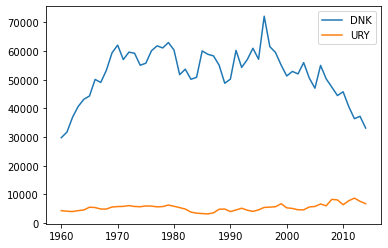

In [26]:
# CONCAT
ts = pd.concat([ts_dk, ts_ury], axis=1, keys=['DNK', 'URY']) # axis=0 is default (concats like sql UNION) axis=1 concats the data along the x axis
print(ts[:4])
ts.plot()

More information on `DataFrame`s can be found here:
http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe

Similar to, we can create `DataFrame`s by giving the data for the values and indexes explicitely.

In [27]:
dates = pd.date_range('20200602', periods=6) # create 6 dates from september 2nd, 2020.
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # use np.random.randn to generate a dataframe of 6 by 4 random numbers
print(dates)
print(df)
#df.describe()

DatetimeIndex(['2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2020-06-02 -0.853386  0.321832 -0.488886  0.045202
2020-06-03 -0.251655  1.186988 -0.245621 -0.070824
2020-06-04  0.343843  0.654265  0.151826 -0.613958
2020-06-05 -1.424367  0.521013  0.210123  0.258606
2020-06-06  1.008169 -0.074266 -0.643197  1.180846
2020-06-07 -0.210794 -0.226094 -0.590310  0.503971


In [28]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.231365  0.397290 -0.267677  0.217307
std    0.857707  0.514127  0.373846  0.602649
min   -1.424367 -0.226094 -0.643197 -0.613958
25%   -0.702953  0.024759 -0.564954 -0.041817
50%   -0.231225  0.421423 -0.367253  0.151904
75%    0.205184  0.620952  0.052464  0.442630
max    1.008169  1.186988  0.210123  1.180846

## 03 Exercise pandas dataframe
1. Using the dataframe in the above cell find:
    1. Mean, Min, Max values for all 4 columns
    2. The 2 dates with the largest and smallest sum (by column)
    3. All dates where both A's and B's are positive

## A few useful pandas methods
1. `df.set_index('Col name here')` set index of a data frame to be one of the columns (must be unique values)
2. `df.sort_values(ascending=False)`
3. `pd.read_csv('../../../data/country_codes.csv', sep='\t', header=None)` 
4. `df['col'].str.strip()` use ds.str.some_method to do string operations on all values in dataframe column (data series)
5. `data[data['Column Name'].isin(some_list)]` Filters all rows to only those where the value in specified column exists in a specified list
6. `filter = as_and_bs[as_and_bs > 0]` Create a filter where all non-validate values is replaced with NaN
7. `filter_na = filter.notna()` create a boolean mask to remove all NaN values
8. `filter_na.any(axis=1)` any() includes all rows where a single True is present
9. `filter_na.all(axis=1)` all() includes only those rows where all cells are True
10. `ds.replace(val1,val2)` replaces all instances of val1 with val2
11. `data[['col1','col2']].apply(pd.to_numeric)` convert all values of collumn 1 and 2 from string to numeric
12. `df['col 3'] = df['col1']/df['col2']` creates a new column in the data frame with the result of dividing each value in column 1 with the equivilent value in column 2


In [29]:
# Base data frames
data_people = {'Name':['Henning', 'Hassan', 'Helle', 'Harissa'],'Age':[20, 21, 19, 18], 'Phone':[3,2,4,1]} 
data_phones = {'Id':[1,2,3,4],'Number':['+4598877665','+4523344556','+4543543456','+4539105843'],'Description':['Home','Work','Home','Mobile']}
df_people = pd.DataFrame(data_people)
df_phones = pd.DataFrame(data_phones)
df_people

Name  Age  Phone
0  Henning   20      3
1   Hassan   21      2
2    Helle   19      4
3  Harissa   18      1

In [30]:
df_phones

Id       Number Description
0   1  +4598877665        Home
1   2  +4523344556        Work
2   3  +4543543456        Home
3   4  +4539105843      Mobile

In [31]:
# 1 set_index
df_phones_new = df_phones.set_index('Number')
df_phones_new

Id Description
Number                     
+4598877665   1        Home
+4523344556   2        Work
+4543543456   3        Home
+4539105843   4      Mobile

In [32]:
# find by number
df_phones_new.loc['+4523344556']

Id                2
Description    Work
Name: +4523344556, dtype: object

In [33]:
# sort
df_people_sorted = df_people.sort_values('Age',ascending=False)
df_people_sorted

Name  Age  Phone
1   Hassan   21      2
0  Henning   20      3
2    Helle   19      4
3  Harissa   18      1

In [34]:
# use DataSeries .str attribute to apply string methods to a column in a dataframe
df_people['Name'] = df_people['Name'].str.upper()
df_people

Name  Age  Phone
0  HENNING   20      3
1   HASSAN   21      2
2    HELLE   19      4
3  HARISSA   18      1

In [35]:
# filter
df_people_filtered = df_people[df_people['Age'] > 19]
df_people_filtered

Name  Age  Phone
0  HENNING   20      3
1   HASSAN   21      2

In [36]:
# isin() filters all rows based on whether value is in list
df_phones[df_phones['Number'].isin(['+4598877665','+4543543456'])]

Id       Number Description
0   1  +4598877665        Home
2   3  +4543543456        Home

In [37]:
# merged
df_merged = pd.merge(df_people, df_phones, left_on='Phone', right_on='Id')
df_merged

Name  Age  Phone  Id       Number Description
0  HENNING   20      3   3  +4543543456        Home
1   HASSAN   21      2   2  +4523344556        Work
2    HELLE   19      4   4  +4539105843      Mobile
3  HARISSA   18      1   1  +4598877665        Home

In [38]:
# apply()
df_merged[['Age','Phone']].apply(pd.to_numeric)

Age  Phone
0   20      3
1   21      2
2   19      4
3   18      1

In [39]:
# new column
df_merged['new column'] = df_merged['Age']/df_merged['Phone']*100
df_merged

Name  Age  Phone  Id       Number Description   new column
0  HENNING   20      3   3  +4543543456        Home   666.666667
1   HASSAN   21      2   2  +4523344556        Work  1050.000000
2    HELLE   19      4   4  +4539105843      Mobile   475.000000
3  HARISSA   18      1   1  +4598877665        Home  1800.000000

In [28]:
# Find average achivements pr. year
data_people = {'Name':['Henning', 'Henning', 'Harissa', 'Harissa'],'Age':[20, None, 19, None], 'Achievements':[None,40,None,35]} 
df = pd.DataFrame(data_people)
df

Name   Age  Achievements
0  Henning  20.0           NaN
1  Henning   NaN          40.0
2  Harissa  19.0           NaN
3  Harissa   NaN          35.0

In [36]:
age = df[df['Age'].notnull()]
achieve = df[df['Achievements'].notnull()]
print(age)
average = age['Age']/achieve['Achievements'].tolist()
result = age.copy()
result['Result'] = average
result[['Name','Result']]


      Name   Age  Achievements
0  Henning  20.0           NaN
2  Harissa  19.0           NaN


Name    Result
0  Henning  0.500000
2  Harissa  0.542857

## Working with real data
Since we do not want to work on random example data. We will have a look on the **military expenditures** of some countries in the world. We will use this data to exemplify usage of Pandas' `DataFrame` methods.

Again, we will receive the data from the World Bank.
http://data.worldbank.org/indicator/MS.MIL.XPND.CN?locations=DK-CN-US-RU

In [40]:
import requests

url = 'http://api.worldbank.org/v2/en/indicator/MS.MIL.XPND.CN'

response = requests.get(url, params={'downloadformat': 'csv'})
fname = response.headers['Content-Disposition'].split('=')[1]
print(response.headers)

if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   

print('Downloaded',fname)
#print('Downloaded {}'.format(fname))

{'Date': 'Wed, 03 Mar 2021 13:14:11 GMT', 'Content-Type': 'application/zip', 'Content-Length': '42258', 'Connection': 'keep-alive', 'Set-Cookie': 'api_http.cookie=2f4d39862a2fa1b0b0b0c4ad37e6251a; Path=/, dataapi.cookie=853586186.20480.0000; path=/; Httponly, BIGipServerdataapi.sfarm=1604433930.20480.0000; path=/; Httponly, TS01fa65e4=01359ee976e45d4368e3ad33aa7eb310bc0f78e711f1974eb4c2eb1d35c2b823eb6bfe7d1f4a60ec279b94a067836a31cf5875d703e3fe5eb798e2dc8009a4d2e17b299e11dfb352d3222cede307e5c8107132ef54; Path=/, TS019865bf=01689d3836474031de04bfa14aa735b210f9db9cda54f65de96e7b6f4a578a59c77970afd0fbf739d335d22350f9970a5e3d6a3c0d3c07966a0db06e457408a1352b380f68907507f836dd6bf9f1b891ed3618f9e8f73459d6544c12c6a7e0480e7c58ac2c; Path=/', 'Cache-Control': 'public, must-revalidate, max-age=1', 'Expires': 'Wed, 03 Mar 2021 13:14:12 GMT', 'Last-Modified': 'Wed, 03 Mar 2021 13:14:11 GMT', 'Content-Disposition': 'attachment; filename=API_MS.MIL.XPND.CN_DS2_en_csv_v2_2055776.zip', 'Request-Context':

In [41]:
import os
import zipfile

zipfile.ZipFile(fname, 'r').extractall('.')
os.remove(fname)

In [42]:
%%bash
ls -ltrh | tail

drwxr-xr-x  8 jovyan  1000  4.0K Mar  1 18:28 modules
-rw-r--r--  1 jovyan users  2.5K Mar  1 20:59 14-4 Testing.ipynb
drwxr-xr-x  4 jovyan  1000  4.0K Mar  2 14:26 data
-rw-rw-r--  1 jovyan  1000   59K Mar  2 16:15 pandas_class_x_solutions.ipynb
-rwxr-xr-x  1 jovyan  1000  8.9K Mar  3 07:29 07-3 selenium.ipynb
-rw-r--r--  1 jovyan users   756 Mar  3 07:34 geckodriver.log
-rwxr-xr-x  1 jovyan  1000  5.6M Mar  3 13:13 05-2 pandas.ipynb
-rw-r--r--  1 jovyan users  1.7K Mar  3 13:14 Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2_2055776.csv
-rw-r--r--  1 jovyan users   31K Mar  3 13:14 Metadata_Country_API_MS.MIL.XPND.CN_DS2_en_csv_v2_2055776.csv
-rw-r--r--  1 jovyan users  141K Mar  3 13:14 API_MS.MIL.XPND.CN_DS2_en_csv_v2_2055776.csv


In [43]:
%%bash
head ./data/Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2_898165.csv

﻿"INDICATOR_CODE","INDICATOR_NAME","SOURCE_NOTE","SOURCE_ORGANIZATION",
"MS.MIL.XPND.CN","Military expenditure (current LCU)","Military expenditures data from SIPRI are derived from the NATO definition, which includes all current and capital expenditures on the armed forces, including peacekeeping forces; defense ministries and other government agencies engaged in defense projects; paramilitary forces, if these are judged to be trained and equipped for military operations; and military space activities. Such expenditures include military and civil personnel, including retirement pensions of military personnel and social services for personnel; operation and maintenance; procurement; military research and development; and military aid (in the military expenditures of the donor country). Excluded are civil defense and current expenditures for previous military activities, such as for veterans' benefits, demobilization, conversion, and destruction of weapons. This definition cannot be app

Now, we use Pandas' `read_csv` function to read the downloaded CSV file directly. Note that we have to skip the first four rows as they do not contain data we are interested in, see keyword argument `skiprows=4`.

Reading the CSV file like this returns a `DataFrame` directly.

In [44]:
import pandas as pd
expenditure_csv = 'data/API_MS.MIL.XPND.CN_DS2_en_csv_v2_898165.csv'

expenditures = pd.read_csv(expenditure_csv, skiprows=4)
expenditures

Country Name Country Code                      Indicator Name  \
0           Aruba          ABW  Military expenditure (current LCU)   
1     Afghanistan          AFG  Military expenditure (current LCU)   
2          Angola          AGO  Military expenditure (current LCU)   
3         Albania          ALB  Military expenditure (current LCU)   
4         Andorra          AND  Military expenditure (current LCU)   
..            ...          ...                                 ...   
259        Kosovo          XKX  Military expenditure (current LCU)   
260   Yemen, Rep.          YEM  Military expenditure (current LCU)   
261  South Africa          ZAF  Military expenditure (current LCU)   
262        Zambia          ZMB  Military expenditure (current LCU)   
263      Zimbabwe          ZWE  Military expenditure (current LCU)   

     Indicator Code        1960        1961         1962         1963  \
0    MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   
1    MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   
2    MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   
3    MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   
4    MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   
..              ...         ...         ...          ...          ...   
259  MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   
260  MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   
261  MS.MIL.XPND.CN  50000000.0  81250000.0  133000000.0  135000000.0   
262  MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   
263  MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   

            1964         1965  ...          2011          2012          2013  \
0            NaN          NaN  ...           NaN           NaN           NaN   
1            NaN          NaN  ...  1.523050e+10  1.214900e+10  1.202767e+10   
2            NaN          NaN  ...  3.418750e+11  3.956800e+11  5.878690e+11   
3            NaN          NaN  ...  1.987700e+10  1.982000e+10  1.902200e+10   
4            NaN          NaN  ...           NaN           NaN           NaN   
..           ...          ...  ...           ...           ...           ...   
259          NaN          NaN  ...  3.666471e+07  3.377049e+07  3.660178e+07   
260          NaN          NaN  ...  3.447000e+11  3.470000e+11  3.543000e+11   
261  194000000.0  206750000.0  ...  3.335875e+10  3.685940e+10  3.976155e+10   
262          NaN          NaN  ...  1.502500e+09  1.782500e+09  2.057700e+09   
263          NaN   15600000.0  ...  1.984380e+08  3.182720e+08  3.567000e+08   

             2014          2015          2016          2017          2018  \
0             NaN           NaN           NaN           NaN           NaN   
1    1.535600e+10  1.219917e+10  1.261483e+10  1.302083e+10  1.431083e+10   
2    6.730000e+11  4.332160e+11  4.523560e+11  5.081750e+11  5.012240e+11   
3    1.878800e+10  1.667100e+10  1.625000e+10  1.719900e+10  1.949200e+10   
4             NaN           NaN           NaN           NaN           NaN   
..            ...           ...           ...           ...           ...   
259  4.038172e+07  4.507072e+07  4.696200e+07  5.103600e+07  5.366700e+07   
260  3.685000e+11           NaN           NaN           NaN           NaN   
261  4.224380e+10  4.451422e+10  4.666570e+10  4.854898e+10  4.821218e+10   
262  2.729418e+09  3.215100e+09  3.088700e+09  3.204640e+09  3.955630e+09   
263  3.681000e+08  3.766770e+08  3.580650e+08  3.405220e+08  4.203640e+08   

     2019  Unnamed: 64  
0     NaN          NaN  
1     NaN          NaN  
2     NaN          NaN  
3     NaN          NaN  
4     NaN          NaN  
..    ...          ...  
259   NaN          NaN  
260   NaN          NaN  
261   NaN          NaN  
262   NaN          NaN  
263   NaN          NaN  

[264 rows x 65 columns]

## Viewing Data

In [45]:
expenditures.head()

Country Name Country Code                      Indicator Name  \
0        Aruba          ABW  Military expenditure (current LCU)   
1  Afghanistan          AFG  Military expenditure (current LCU)   
2       Angola          AGO  Military expenditure (current LCU)   
3      Albania          ALB  Military expenditure (current LCU)   
4      Andorra          AND  Military expenditure (current LCU)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...          2011  \
0  MS.MIL.XPND.CN   NaN   NaN   NaN   NaN   NaN   NaN  ...           NaN   
1  MS.MIL.XPND.CN   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.523050e+10   
2  MS.MIL.XPND.CN   NaN   NaN   NaN   NaN   NaN   NaN  ...  3.418750e+11   
3  MS.MIL.XPND.CN   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.987700e+10   
4  MS.MIL.XPND.CN   NaN   NaN   NaN   NaN   NaN   NaN  ...           NaN   

           2012          2013          2014          2015          2016  \
0           NaN           NaN           NaN           NaN           NaN   
1  1.214900e+10  1.202767e+10  1.535600e+10  1.219917e+10  1.261483e+10   
2  3.956800e+11  5.878690e+11  6.730000e+11  4.332160e+11  4.523560e+11   
3  1.982000e+10  1.902200e+10  1.878800e+10  1.667100e+10  1.625000e+10   
4           NaN           NaN           NaN           NaN           NaN   

           2017          2018  2019  Unnamed: 64  
0           NaN           NaN   NaN          NaN  
1  1.302083e+10  1.431083e+10   NaN          NaN  
2  5.081750e+11  5.012240e+11   NaN          NaN  
3  1.719900e+10  1.949200e+10   NaN          NaN  
4           NaN           NaN   NaN          NaN  

[5 rows x 65 columns]

In [46]:
expenditures.tail()

Country Name Country Code                      Indicator Name  \
259        Kosovo          XKX  Military expenditure (current LCU)   
260   Yemen, Rep.          YEM  Military expenditure (current LCU)   
261  South Africa          ZAF  Military expenditure (current LCU)   
262        Zambia          ZMB  Military expenditure (current LCU)   
263      Zimbabwe          ZWE  Military expenditure (current LCU)   

     Indicator Code        1960        1961         1962         1963  \
259  MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   
260  MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   
261  MS.MIL.XPND.CN  50000000.0  81250000.0  133000000.0  135000000.0   
262  MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   
263  MS.MIL.XPND.CN         NaN         NaN          NaN          NaN   

            1964         1965  ...          2011          2012          2013  \
259          NaN          NaN  ...  3.666471e+07  3.377049e+07  3.660178e+07   
260          NaN          NaN  ...  3.447000e+11  3.470000e+11  3.543000e+11   
261  194000000.0  206750000.0  ...  3.335875e+10  3.685940e+10  3.976155e+10   
262          NaN          NaN  ...  1.502500e+09  1.782500e+09  2.057700e+09   
263          NaN   15600000.0  ...  1.984380e+08  3.182720e+08  3.567000e+08   

             2014          2015          2016          2017          2018  \
259  4.038172e+07  4.507072e+07  4.696200e+07  5.103600e+07  5.366700e+07   
260  3.685000e+11           NaN           NaN           NaN           NaN   
261  4.224380e+10  4.451422e+10  4.666570e+10  4.854898e+10  4.821218e+10   
262  2.729418e+09  3.215100e+09  3.088700e+09  3.204640e+09  3.955630e+09   
263  3.681000e+08  3.766770e+08  3.580650e+08  3.405220e+08  4.203640e+08   

     2019  Unnamed: 64  
259   NaN          NaN  
260   NaN          NaN  
261   NaN          NaN  
262   NaN          NaN  
263   NaN          NaN  

[5 rows x 65 columns]

In [47]:
expenditures.index

RangeIndex(start=0, stop=264, step=1)

In [48]:
expenditures.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [49]:
expenditures.values

array([['Aruba', 'ABW', 'Military expenditure (current LCU)', ..., nan,
        nan, nan],
       ['Afghanistan', 'AFG', 'Military expenditure (current LCU)', ...,
        14310833333.3333, nan, nan],
       ['Angola', 'AGO', 'Military expenditure (current LCU)', ...,
        501224000000.0, nan, nan],
       ...,
       ['South Africa', 'ZAF', 'Military expenditure (current LCU)', ...,
        48212175000.0, nan, nan],
       ['Zambia', 'ZMB', 'Military expenditure (current LCU)', ...,
        3955630000.0, nan, nan],
       ['Zimbabwe', 'ZWE', 'Military expenditure (current LCU)', ...,
        420364000.0, nan, nan]], dtype=object)

## Selection of Data in a `DataFrame`

### Selection by Column Name


In [50]:
len(list(expenditures['Country Name']))

264

In [51]:
list(expenditures['Country Code'])

['ABW',
 'AFG',
 'AGO',
 'ALB',
 'AND',
 'ARB',
 'ARE',
 'ARG',
 'ARM',
 'ASM',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CEB',
 'CHE',
 'CHI',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CSS',
 'CUB',
 'CUW',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'EAP',
 'EAR',
 'EAS',
 'ECA',
 'ECS',
 'ECU',
 'EGY',
 'EMU',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'EUU',
 'FCS',
 'FIN',
 'FJI',
 'FRA',
 'FRO',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIB',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GRL',
 'GTM',
 'GUM',
 'GUY',
 'HIC',
 'HKG',
 'HND',
 'HPC',
 'HRV',
 'HTI',
 'HUN',
 'IBD',
 'IBT',
 'IDA',
 'IDB',
 'IDN',
 'IDX',
 'IMN',
 'IND',
 'INX',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',


### Selection by Indexes

In the following we index the third row directly.

In [52]:
# get row 3
albania = expenditures.iloc[3]
print(albania)

Country Name                                 Albania
Country Code                                     ALB
Indicator Name    Military expenditure (current LCU)
Indicator Code                        MS.MIL.XPND.CN
1960                                             NaN
                                 ...                
2016                                       1.625e+10
2017                                      1.7199e+10
2018                                      1.9492e+10
2019                                             NaN
Unnamed: 64                                      NaN
Name: 3, Length: 65, dtype: object


In [53]:
# using .loc to extract by label (row or column)
expenditures.loc[3]

Country Name                                 Albania
Country Code                                     ALB
Indicator Name    Military expenditure (current LCU)
Indicator Code                        MS.MIL.XPND.CN
1960                                             NaN
                                 ...                
2016                                       1.625e+10
2017                                      1.7199e+10
2018                                      1.9492e+10
2019                                             NaN
Unnamed: 64                                      NaN
Name: 3, Length: 65, dtype: object

In [54]:
expenditures.iloc[3:5]

Country Name Country Code                      Indicator Name  \
3      Albania          ALB  Military expenditure (current LCU)   
4      Andorra          AND  Military expenditure (current LCU)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...          2011  \
3  MS.MIL.XPND.CN   NaN   NaN   NaN   NaN   NaN   NaN  ...  1.987700e+10   
4  MS.MIL.XPND.CN   NaN   NaN   NaN   NaN   NaN   NaN  ...           NaN   

           2012          2013          2014          2015          2016  \
3  1.982000e+10  1.902200e+10  1.878800e+10  1.667100e+10  1.625000e+10   
4           NaN           NaN           NaN           NaN           NaN   

           2017          2018  2019  Unnamed: 64  
3  1.719900e+10  1.949200e+10   NaN          NaN  
4           NaN           NaN   NaN          NaN  

[2 rows x 65 columns]

In [55]:
# extract sub set of [rows,columns]
expenditures.iloc[3:5, 4:]

1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

           2011          2012          2013          2014          2015  \
3  1.987700e+10  1.982000e+10  1.902200e+10  1.878800e+10  1.667100e+10   
4           NaN           NaN           NaN           NaN           NaN   

           2016          2017          2018  2019  Unnamed: 64  
3  1.625000e+10  1.719900e+10  1.949200e+10   NaN          NaN  
4           NaN           NaN           NaN   NaN          NaN  

[2 rows x 61 columns]

## Boolean Indexing

Similar to NumPy, you can use boolean arrays for indexing. That is, you can use boolean expressions directly for indexing.

In the following we assign `expenditures` to `df`as the latter is shorter.

In [56]:
df = expenditures

Using the `isin()` method for filtering:

In [57]:
df[df['Country Name'].isin(['United States', 'China', 'Denmark', 'Russian Federation'])]

Country Name Country Code                      Indicator Name  \
38                China          CHN  Military expenditure (current LCU)   
56              Denmark          DNK  Military expenditure (current LCU)   
200  Russian Federation          RUS  Military expenditure (current LCU)   
249       United States          USA  Military expenditure (current LCU)   

     Indicator Code          1960          1961          1962          1963  \
38   MS.MIL.XPND.CN           NaN           NaN           NaN           NaN   
56   MS.MIL.XPND.CN  1.113000e+09  1.180000e+09  1.551000e+09  1.651000e+09   
200  MS.MIL.XPND.CN           NaN           NaN           NaN           NaN   
249  MS.MIL.XPND.CN  4.538000e+10  4.780800e+10  5.238100e+10  5.229500e+10   

             1964          1965  ...          2011          2012  \
38            NaN           NaN  ...  8.914702e+11  9.935000e+11   
56   1.764000e+09  1.974000e+09  ...  2.425900e+10  2.561700e+10   
200           NaN           NaN  ...  2.063740e+12  2.512500e+12   
249  5.121300e+10  5.182700e+10  ...  7.113380e+11  6.847800e+11   

             2013          2014          2015          2016          2017  \
38   1.114496e+12  1.233430e+12  1.333262e+12  1.436617e+12  1.541448e+12   
56   2.368200e+10  2.276900e+10  2.263300e+10  2.419000e+10  2.496100e+10   
200  2.812900e+12  3.250500e+12  4.047400e+12  4.644800e+12  3.879916e+12   
249  6.397040e+11  6.099140e+11  5.961046e+11  6.001064e+11  6.058029e+11   

             2018  2019  Unnamed: 64  
38   1.654051e+12   NaN          NaN  
56   2.670000e+10   NaN          NaN  
200  3.849569e+12   NaN          NaN  
249  6.487983e+11   NaN          NaN  

[4 rows x 65 columns]

Here, we create a `DataFrame` of all country codes for the four countries, which we want to study further in the following.

In [58]:
# get indices for the 4 countries in question:
c_codes = df[df['Country Name'].isin(['United States', 'China', 
                                        'Denmark', 'Russian Federation'])]['Country Code']
c_codes

38     CHN
56     DNK
200    RUS
249    USA
Name: Country Code, dtype: object

We cannot plot the time series of military expenditures directly in a meaningful way as we would like to have the years on the y-axis but in the selection of our `DataFrame`, the year numbers are column names. Consequently, we have to transpose our `DataFrame`, see `T` function.

Note, that the expenditures are given in `LUC` in the World Bank data set. That is, in currency of the corresponding country.

             1987          1988          1989          1990          1991  \
38            NaN           NaN  4.293526e+10  4.823906e+10  5.298712e+10   
56   1.464700e+10  1.562000e+10  1.596300e+10  1.639900e+10  1.709100e+10   
200           NaN           NaN           NaN           NaN           NaN   
249  2.881570e+11  2.930930e+11  3.040850e+11  3.061700e+11  2.802920e+11   

             1992          1993          1994          1995          1996  \
38   6.849287e+10  7.246913e+10  8.662339e+10  1.052799e+11  1.210814e+11   
56   1.712900e+10  1.739000e+10  1.729300e+10  1.746800e+10  1.789600e+10   
200  9.040000e+08  7.702000e+09  2.968000e+10  5.809100e+10  8.104400e+10   
249  3.051410e+11  2.976370e+11  2.880590e+11  2.788560e+11  2.714170e+11   

     ...          2010          2011          2012          2013  \
38   ...  7.834000e+11  8.914702e+11  9.935000e+11  1.114496e+12   
56   ...  2.532800e+10  2.425900e+10  2.561700e+10  2.368200e+10   
200  ...  1.783210e+12  

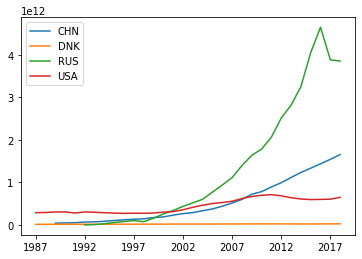

In [59]:
import matplotlib.pyplot as plt

# get only the 4 countries from df and only cols: 31-end (only 1987 and up)
#print(df.iloc[c_code_df.index,31:-1])
ts_df = df.iloc[c_codes.index, 31:-1]
print(ts_df)
ts_df = ts_df.T
print(ts_df)
ts_df = ts_df.rename(columns=dict(c_codes))
print(ts_df)
ts_df
ts_df.plot()

Since this plot may be a bit misleading, we will 'normalize' all expeditures to Euro, so that they are better comparible.

In [60]:
import requests


# http://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html#dev
response = requests.get('http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml')
response.text

'<?xml version="1.0" encoding="UTF-8"?>\n<gesmes:Envelope xmlns:gesmes="http://www.gesmes.org/xml/2002-08-01" xmlns="http://www.ecb.int/vocabulary/2002-08-01/eurofxref">\n\t<gesmes:subject>Reference rates</gesmes:subject>\n\t<gesmes:Sender>\n\t\t<gesmes:name>European Central Bank</gesmes:name>\n\t</gesmes:Sender>\n\t<Cube>\n\t\t<Cube time=\'2021-03-02\'>\n\t\t\t<Cube currency=\'USD\' rate=\'1.2028\'/>\n\t\t\t<Cube currency=\'JPY\' rate=\'128.58\'/>\n\t\t\t<Cube currency=\'BGN\' rate=\'1.9558\'/>\n\t\t\t<Cube currency=\'CZK\' rate=\'26.142\'/>\n\t\t\t<Cube currency=\'DKK\' rate=\'7.4361\'/>\n\t\t\t<Cube currency=\'GBP\' rate=\'0.86433\'/>\n\t\t\t<Cube currency=\'HUF\' rate=\'363.70\'/>\n\t\t\t<Cube currency=\'PLN\' rate=\'4.5322\'/>\n\t\t\t<Cube currency=\'RON\' rate=\'4.8762\'/>\n\t\t\t<Cube currency=\'SEK\' rate=\'10.1400\'/>\n\t\t\t<Cube currency=\'CHF\' rate=\'1.1050\'/>\n\t\t\t<Cube currency=\'ISK\' rate=\'152.10\'/>\n\t\t\t<Cube currency=\'NOK\' rate=\'10.2555\'/>\n\t\t\t<Cube cur

In [61]:
from bs4 import BeautifulSoup
# Will be covered in week 7 on webscraping

xml = BeautifulSoup(response.text, 'html.parser')
rate_list = xml.cube.cube.findAll("cube") # [0]['rate']
print(xml.cube)

<cube>
<cube time="2021-03-02">
<cube currency="USD" rate="1.2028"></cube>
<cube currency="JPY" rate="128.58"></cube>
<cube currency="BGN" rate="1.9558"></cube>
<cube currency="CZK" rate="26.142"></cube>
<cube currency="DKK" rate="7.4361"></cube>
<cube currency="GBP" rate="0.86433"></cube>
<cube currency="HUF" rate="363.70"></cube>
<cube currency="PLN" rate="4.5322"></cube>
<cube currency="RON" rate="4.8762"></cube>
<cube currency="SEK" rate="10.1400"></cube>
<cube currency="CHF" rate="1.1050"></cube>
<cube currency="ISK" rate="152.10"></cube>
<cube currency="NOK" rate="10.2555"></cube>
<cube currency="HRK" rate="7.5825"></cube>
<cube currency="RUB" rate="88.6885"></cube>
<cube currency="TRY" rate="8.8151"></cube>
<cube currency="AUD" rate="1.5422"></cube>
<cube currency="BRL" rate="6.8387"></cube>
<cube currency="CAD" rate="1.5225"></cube>
<cube currency="CNY" rate="7.7840"></cube>
<cube currency="HKD" rate="9.3297"></cube>
<cube currency="IDR" rate="17230.11"></cube>
<cube currency="

In [62]:


currency = ['USD', 'DKK', 'RUB', 'CNY']
rate_dict = dict.fromkeys(currency) # create a new dict with given keys
#print(rate_dict)
for element in rate_list:
    if element['currency'] in currency:
        rate_dict[element['currency']] = float(element['rate'])
        print(element['rate'])
rate_dict

1.2028
7.4361
88.6885
7.7840


{'USD': 1.2028, 'DKK': 7.4361, 'RUB': 88.6885, 'CNY': 7.784}

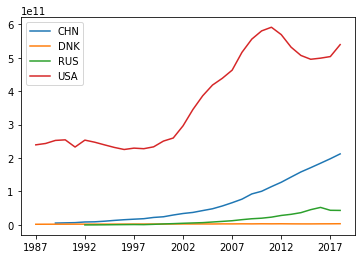

In [63]:
# get all weapons expenditure in euros
ts_df['DNK'] = ts_df['DNK'] / rate_dict['DKK']
ts_df['USA'] = ts_df['USA'] / rate_dict['USD']
ts_df['CHN'] = ts_df['CHN'] / rate_dict['CNY']
ts_df['RUS'] = ts_df['RUS'] / rate_dict['RUB']
ts_df.plot()

**OBS!!!** Be careful, the graph above is still not really well suited for comparison as currency exchange rates are not fix. However, the code above normalizes just relying on the most current exchange rate from the European Central Bank. See the exercise block in the bottom for how to fix that isuue!

## Sorting dataframes

In case you have to sort the data in your `DataFrames` see the methods `sort_index` and `sort_values`.


```python
df.sort_index(axis=1, ascending=True)
df.sort_values(by='Country Code')
```

In [64]:
df.sort_index?

In [65]:
df.sort_values?

## 04 Class Exercise
#### Find military expenditure pr. capita.

Go here and get data as csv: [worldbank military expanditure](https://databank.worldbank.org/reports.aspx?source=2&series=MS.MIL.XPND.CD&country=#). Download it manually, unzip the csv and clean up empty rows.  
1. Use .replace() method on the dataframe to remove all data containing '..'
2. Set index of the dataframe to be 'Country Name'
3. Slice the 2019 column data to get a data series.
4. Make data numeric (pd.to_numeric(data_series))

1. For 2019 find the 10 countries with the highest military expenditure in USD
2. For 2019 find the 10 countries with the highest military expenditure per capita. Find the population data here: [worldbank](https://databank.worldbank.org/source/world-development-indicators/preview/on#)(use series='Population,Total' and time='2019' and Country= countries (217)) **or** use [copy paste with this date into excel](https://www.worldometers.info/world-population/population-by-country/)
  - (Hint: use pd.merge() to merge the mil_exp dataframe with the population dataframe on 2 columns (country_code)
3. For 2019 find the 3 countries with the highest per capita military expenditure in the middle east
  - [countries list with iso code](middleeast_countries.csv) or use:   
  `list_of_middle_eastern = ['YEM','ARE','TUR','SYR','SAU','QAT','PSE','OMN','LBN','KWT','JOR','ISR','IRQ','IRN','EGY','CYP','BHR']`


## Self study exercise

Complete the comparison of military expenditures by converting all currencies to USD. Since we have yearly expenditures, use for example the yearly median for normalization. Likely, you will find an API to collect historical echange rates at Yahoo Finance.

[https://finance.yahoo.com/quote/USDRUB%3DX](https://finance.yahoo.com/quote/USDRUB%3DX)





In [67]:
pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=*&ALDER=IALT&CIVILSTAND=TOT',sep=';')

OMRÅDE      KØN  ALDER CIVILSTAND     TID  INDHOLD
0           Hele landet    I alt  I alt      I alt  2021K1  5840045
1           Hele landet     Mænd  I alt      I alt  2021K1  2904857
2           Hele landet  Kvinder  I alt      I alt  2021K1  2935188
3    Region Hovedstaden    I alt  I alt      I alt  2021K1  1855084
4    Region Hovedstaden     Mænd  I alt      I alt  2021K1   910720
..                  ...      ...    ...        ...     ...      ...
310     Vesthimmerlands     Mænd  I alt      I alt  2021K1    18455
311     Vesthimmerlands  Kvinder  I alt      I alt  2021K1    17907
312             Aalborg    I alt  I alt      I alt  2021K1   219487
313             Aalborg     Mænd  I alt      I alt  2021K1   110644
314             Aalborg  Kvinder  I alt      I alt  2021K1   108843

[315 rows x 6 columns]